# Question 3

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 16.3MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


## Section 1

In [2]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

## Section 2

In [7]:
from PIL import Image, ImageDraw
import random

def generate_noisy_images():
    """
    Generate noisy versions of a set of images and save them with new filenames.
    """
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy_{i}.jpg"
        apply_noise_to_image(image_path, noisy_image_path)
        print(f"Noisy image saved: {noisy_image_path}")

def apply_noise_to_image(input_path, output_path, noise_factor=50):
    """
    Apply random noise to an image and save the modified version.

    Args:
        input_path (str): Path to the input image.
        output_path (str): Path to save the noisy image.
        noise_factor (int): Intensity of the noise added to the image.
    """
    # Open the input image
    image = Image.open(input_path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pixels = image.load()

    for x in range(width):
        for y in range(height):
            noise = random.randint(-noise_factor, noise_factor)
            r, g, b = pixels[x, y]

            # Apply noise and keep values in the valid range (0-255)
            r = max(0, min(255, r + noise))
            g = max(0, min(255, g + noise))
            b = max(0, min(255, b + noise))

            draw.point((x, y), (r, g, b))

    # Save the modified image
    image.save(output_path, "JPEG")
    del draw  # Clean up

# Generate and save noisy images
generate_noisy_images()

Noisy image saved: /content/noisy_1.jpg
Noisy image saved: /content/noisy_2.jpg
Noisy image saved: /content/noisy_3.jpg
Noisy image saved: /content/noisy_4.jpg
Noisy image saved: /content/noisy_5.jpg


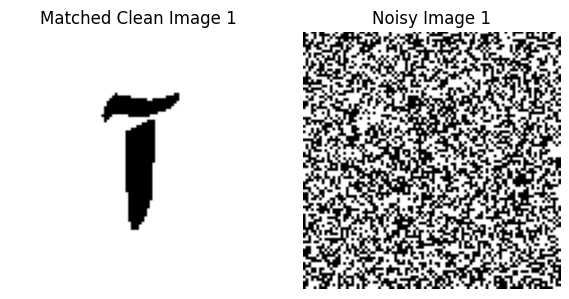

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class HammingNetwork:
    def __init__(self, clean_images):
        """
        Initialize the Hamming Network with clean binary images.

        Parameters:
            clean_images: list of np.array, the set of normal binary images.
        """
        self.clean_images = [image.flatten() for image in clean_images]  # Flatten for vector processing

    def match(self, noisy_image):
        """
        Matches the noisy binary image to the closest clean image.

        Parameters:
            noisy_image: np.array, the noisy binary image to be matched.

        Returns:
            index: int, the index of the matched clean image.
            matched_image: PIL.Image.Image, the matched clean image.
        """
        noisy_image = noisy_image.flatten()  # Flatten the noisy image
        # Compute Hamming distances to each clean image
        distances = [np.sum(noisy_image != clean_image) for clean_image in self.clean_images]
        index = np.argmin(distances)  # Find the index of the smallest distance

        # Convert the matched image back to 2D array
        matched_array = self.clean_images[index].reshape(96, 96)

        # Convert the binary array (0s and 1s) back to a grayscale image
        matched_image = Image.fromarray((matched_array * 255).astype(np.uint8))  # Scale 0/1 to 0/255
        return index, matched_image

def load_and_preprocess_image(filepath, size=(96, 96)):
    """
    Loads and preprocesses an image for the Hamming Network.

    Parameters:
        filepath: str, path to the image file.
        size: tuple, dimensions to resize the image to.

    Returns:
        np.array: Binary representation of the image (0s and 1s).
    """
    # Load the image
    img = Image.open(filepath).convert("L")  # Convert to grayscale
    img = img.resize(size)  # Resize to 96x96
    # Convert to binary (thresholding)
    binary_img = np.array(img) > 75  # Threshold at 75
    return binary_img.astype(np.int8)  # Convert to 0s and 1s

# Paths to clean and noisy images
clean_image_paths = ["/content/1.jpg", "/content/2.jpg", "/content/3.jpg", "/content/4.jpg", "/content/5.jpg"]
noisy_image_path = "noisy1.jpg"

# Load and preprocess images
clean_images = [load_and_preprocess_image(path) for path in clean_image_paths]
noisy_image = load_and_preprocess_image(noisy_image_path)

# Initialize the Hamming Network
hamming_network = HammingNetwork(clean_images)

# Match the noisy image to a clean image
index, matched_image = hamming_network.match(noisy_image)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

axes[0].imshow(matched_image, cmap='gray')  # Display in grayscale
axes[0].set_title(f"Matched Clean Image {index + 1}")
axes[0].axis("off")  # Hide axes

axes[1].imshow(noisy_image, cmap='gray')  # Display in grayscale
axes[1].set_title(f"Noisy Image 1")
axes[1].axis("off")  # Hide axes
plt.tight_layout()
plt.show()


## Section 3

In [5]:
def generateMissingPointImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        missing_point_path = f"/content/MissingPoint{i}.jpg"
        getNoisyBinaryImage(image_path, missing_point_path)
        print(f"Noisy image for {image_path} generated and saved as {missing_point_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 500

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(0, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateMissingPointImages()

Noisy image for /content/1.jpg generated and saved as /content/MissingPoint1.jpg
Noisy image for /content/2.jpg generated and saved as /content/MissingPoint2.jpg
Noisy image for /content/3.jpg generated and saved as /content/MissingPoint3.jpg
Noisy image for /content/4.jpg generated and saved as /content/MissingPoint4.jpg
Noisy image for /content/5.jpg generated and saved as /content/MissingPoint5.jpg


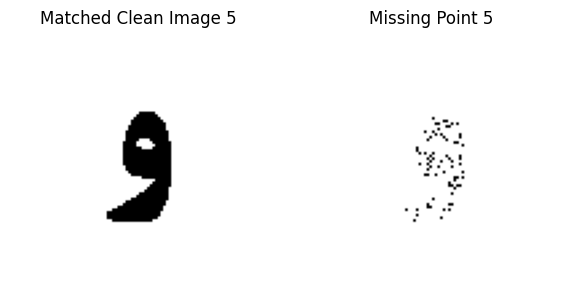

In [6]:
def load_and_preprocess_image(filepath, size=(96, 96)):
    """
    Loads and preprocesses an image for the Hamming Network.

    Parameters:
        filepath: str, path to the image file.
        size: tuple, dimensions to resize the image to.

    Returns:
        np.array: Binary representation of the image (0s and 1s).
    """
    # Load the image
    img = Image.open(filepath).convert("L")  # Convert to grayscale
    img = img.resize(size)  # Resize to 96x96
    # Convert to binary (thresholding)
    binary_img = np.array(img) > 75  # Threshold at 75
    return binary_img.astype(np.int8)  # Convert to 0s and 1s


# Paths to clean and noisy images
clean_image_paths = ["/content/1.jpg", "/content/2.jpg", "/content/3.jpg", "/content/4.jpg", "/content/5.jpg"]
missing_point_path = "MissingPoint5.jpg"

# Load and preprocess images
clean_images = [load_and_preprocess_image(path) for path in clean_image_paths]
missing_point_image = load_and_preprocess_image(missing_point_path)

# Initialize the Hamming Network
hamming_network = HammingNetwork(clean_images)

# Match the noisy image to a clean image
index, matched_image = hamming_network.match(missing_point_image)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

axes[0].imshow(matched_image, cmap='gray')  # Display in grayscale
axes[0].set_title(f"Matched Clean Image {index + 1}")
axes[0].axis("off")  # Hide axes

axes[1].imshow(missing_point_image, cmap='gray')  # Display in grayscale
axes[1].set_title(f"Missing Point 5")
axes[1].axis("off")  # Hide axes
plt.tight_layout()
plt.show()